In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")

In [4]:
data = pd.read_csv('06e9c61d-e45f-4d74-beb5-e5e53ac6d2de.csv')

## Exploration basique

In [9]:
data.shape

(16512, 11)

In [6]:
data.head()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND


In [ ]:
#Premièrement on remarque un colonne sans nom, probablement une colonne ID
#On remarque aussi qu'il n'y a que des variables quantitatives, exception faite de ocean_proximity qui demandera surement un traitement

In [7]:
data.describe()

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16336.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,10295.498789,-119.564046,35.626523,28.624516,2644.170603,539.319540,1435.017260,501.135962,3.864091,206509.251453
std,5941.973488,2.005033,2.139150,12.597980,2213.946369,425.207704,1158.151967,385.650673,1.893244,115225.957661
min,0.000000,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,5178.750000,-121.790000,33.930000,18.000000,1446.000000,296.000000,788.000000,280.000000,2.562500,119400.000000
50%,10263.500000,-118.490000,34.250000,29.000000,2116.000000,435.000000,1168.000000,410.000000,3.531300,179300.000000
75%,15438.250000,-118.010000,37.710000,37.000000,3154.000000,647.000000,1738.000000,606.000000,4.733225,264500.000000
max,20639.000000,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16336 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB


## Check des doublons

In [10]:
#On regarde s'il y a des duplicats dans la colonne sans nom
data['Unnamed: 0'].duplicated().sum()

0

In [ ]:
#L'absence de duplicats confirme l'hypothèse qu'il s'agit d'une colonne d'identifiants

In [11]:
#On regarde s'il y a des doublons dans le reste du df
data.drop("Unnamed: 0", axis=1).duplicated().sum()

0

In [ ]:
#Rien de ce côté, le df semble propre à ce niveau là.
#Cependant, si deux maisons différentes peuvent en toute logique avoir le même nombre de chambre, ou le même âge,
#il n'est pas vraiment possible que deux maisons différentes aient les mêmes coordonnées GPS.
#Nous devont donc regarder si nous trouvons ce cas de figure

In [12]:
data[['longitude','latitude']].duplicated().sum()

5681

In [ ]:
#En effet, nous avons 5681 lignes où les coordonnées GPS sont les mêmes. 

In [29]:
#Il semble maintenant pertinent de regarder les lignes concernées dans le détail :
duplicate_rows = data.duplicated(subset=['longitude', 'latitude'])
data_duplicated=data[duplicate_rows]
data_duplicated

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
158,17934,-121.95,37.35,48.0,1246.0,294.0,697.0,284.0,3.6118,235500.0,<1H OCEAN
248,208,-122.23,37.79,30.0,610.0,145.0,425.0,140.0,1.6198,122700.0,NEAR BAY
251,1164,-121.55,39.51,48.0,827.0,198.0,396.0,161.0,0.8024,58300.0,INLAND
270,6779,-118.15,34.11,39.0,2618.0,582.0,1314.0,532.0,3.5875,309300.0,<1H OCEAN
341,7229,-118.16,34.02,44.0,1218.0,374.0,1175.0,342.0,1.9688,173900.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...,...
16504,433,-122.29,37.88,46.0,1895.0,442.0,920.0,425.0,2.9926,192100.0,NEAR BAY
16505,11527,-118.08,33.77,26.0,2461.0,562.0,971.0,544.0,2.1944,87500.0,<1H OCEAN
16506,14696,-117.09,32.79,36.0,1529.0,266.0,683.0,260.0,4.0982,171200.0,NEAR OCEAN
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY


In [37]:
#Regardons maintenant si ces doublons ont quelques colonnes en doublon aussi
print(data_duplicated.duplicated(subset=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms']).sum())
print(data_duplicated.duplicated(subset=['longitude','latitude','population','ocean_proximity','median_house_value']).sum())
print(data_duplicated.duplicated(subset=['longitude','latitude','households','median_house_value','housing_median_age']).sum())

0
0
0


In [ ]:
#Il semble que ces doublons soient bien des individus différents.
#Il peut donc s'agir d'une erreur dans les données, ou d'une préconcéption fausse de ma part.
#Il est donc intéressant de faire quelques recherches pour savoir s'il est possible ou non pour deux biens différentes
#d'avoir les mêmes latitudes et longitudes

Point recherche 

In [ ]:
#Après plus d'informations, il est effectivement possible d'avoir la même latitude et longitude pour deux biens différents, 
#Car il fat aussi prendre en compte l'altitude pour avoir des coordonées distinctes.
#Sans avoir accès à cette information, et compte tenu de l'absence de doublons dans les autres colonnes,
#On admet qu'il s'agit effectivement de bien différents et qu'il n'y a donc pas de doublons dans ce jeu de données

## Check des valeurs manquantes

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16336 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB


In [73]:
data['total_bedrooms'].isnull().sum().sum()

176

In [74]:
data['total_bedrooms'].isnull().sum() * 100 / len(data)

1.065891472868217

In [ ]:
#ça ne représente pas une grande portion des données(un peu plus d'1%).
#On pourrait donc les retirer, ou imputer par la médiane.
#Je préfère faire un peu de recherche pour trouver des meilleures méthodes d'imputation.

Point recherche

In [ ]:
#Après quelques recherches, je décide de me pencher sur une approche d'imputation multivariée en utilisant KNNimputer
#C'est un étape qui viendra plus tard.

In [ ]:
#Pour les autres colonnes, il n'y a pas de valeurs nulles, ce qui ne veut pas dire qu'il n'y a pas de valeurs manquantes, 
#puisqu'elles auraient pu être traitées au préalable. 

#On émet l'hypothèse que des valeurs nulles ont été remplacées par un 0.

In [87]:
data.drop("Unnamed: 0", axis=1).describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16336.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.564046,35.626523,28.624516,2644.170603,539.319540,1435.017260,501.135962,3.864091,206509.251453
std,2.005033,2.139150,12.597980,2213.946369,425.207704,1158.151967,385.650673,1.893244,115225.957661
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1446.000000,296.000000,788.000000,280.000000,2.562500,119400.000000
50%,-118.490000,34.250000,29.000000,2116.000000,435.000000,1168.000000,410.000000,3.531300,179300.000000
75%,-118.010000,37.710000,37.000000,3154.000000,647.000000,1738.000000,606.000000,4.733225,264500.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
#On remarque que le minimum est supérieur à 0 pour toutes les variables. On peut donc exclure l'hypothèse que des données 
#manquantes auraient pu être remplacées par des 0.
#Il ne semble pas y avoir de valeurs manquantes pour ces colonnes, mais il reste la variable qualitative

In [45]:
data['ocean_proximity'].value_counts()

<1H OCEAN     7312
INLAND        5235
NEAR OCEAN    2140
NEAR BAY      1821
ISLAND           4
Name: ocean_proximity, dtype: int64

In [ ]:
#Il n'y a pas de classe qui correspondrait à un traitement de valeur manquantes

In [46]:
#Conclusion : Il faudra imputer les valeurs manquantes de la variable total_bedrooms plus tard
#autrement, il n'y a pas de valeurs manquantes dans ce jeu de données

## Visualisation & exploration

In [47]:
#Commençons par regarder les distributions des variables quantitatives

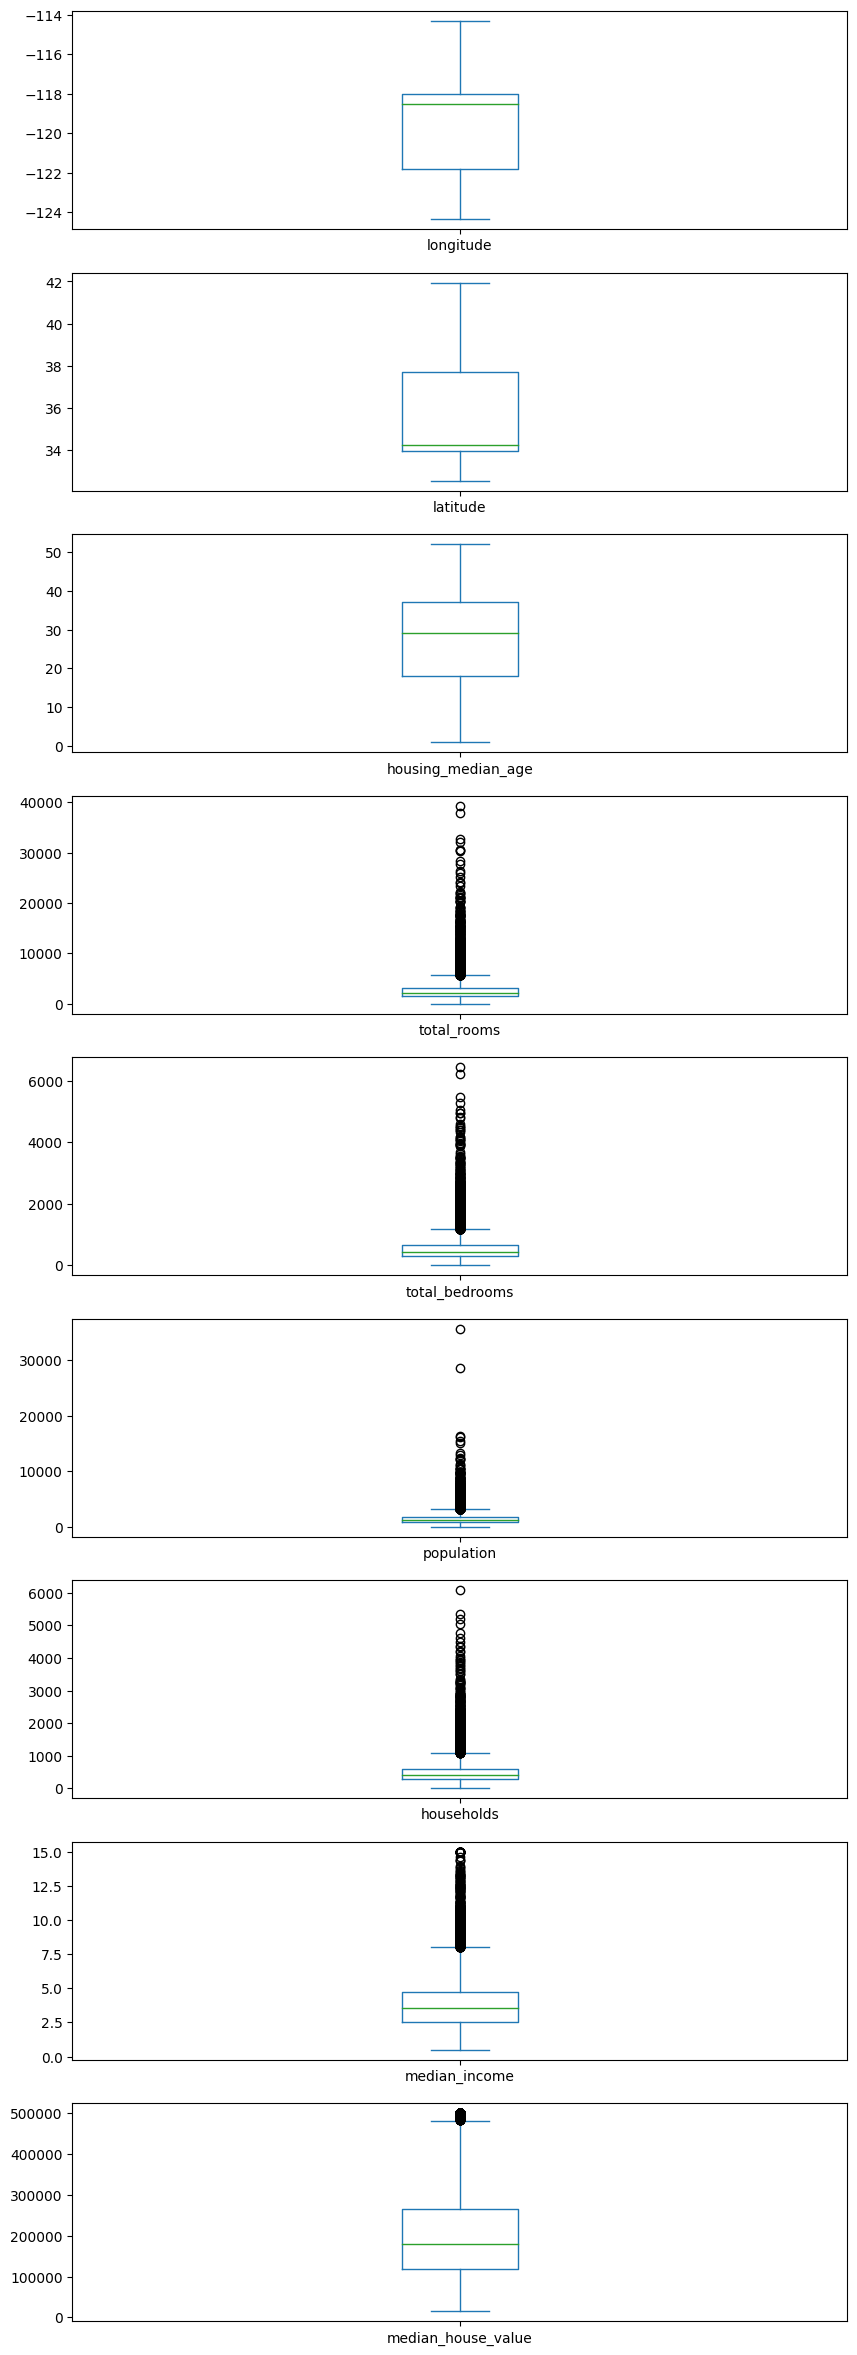

In [60]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 30))
gs = gridspec.GridSpec(len(columns), 1)

for i, col in enumerate(columns):
    ax = fig.add_subplot(gs[i, 0])
    data[col].plot(kind='box', ax=ax)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

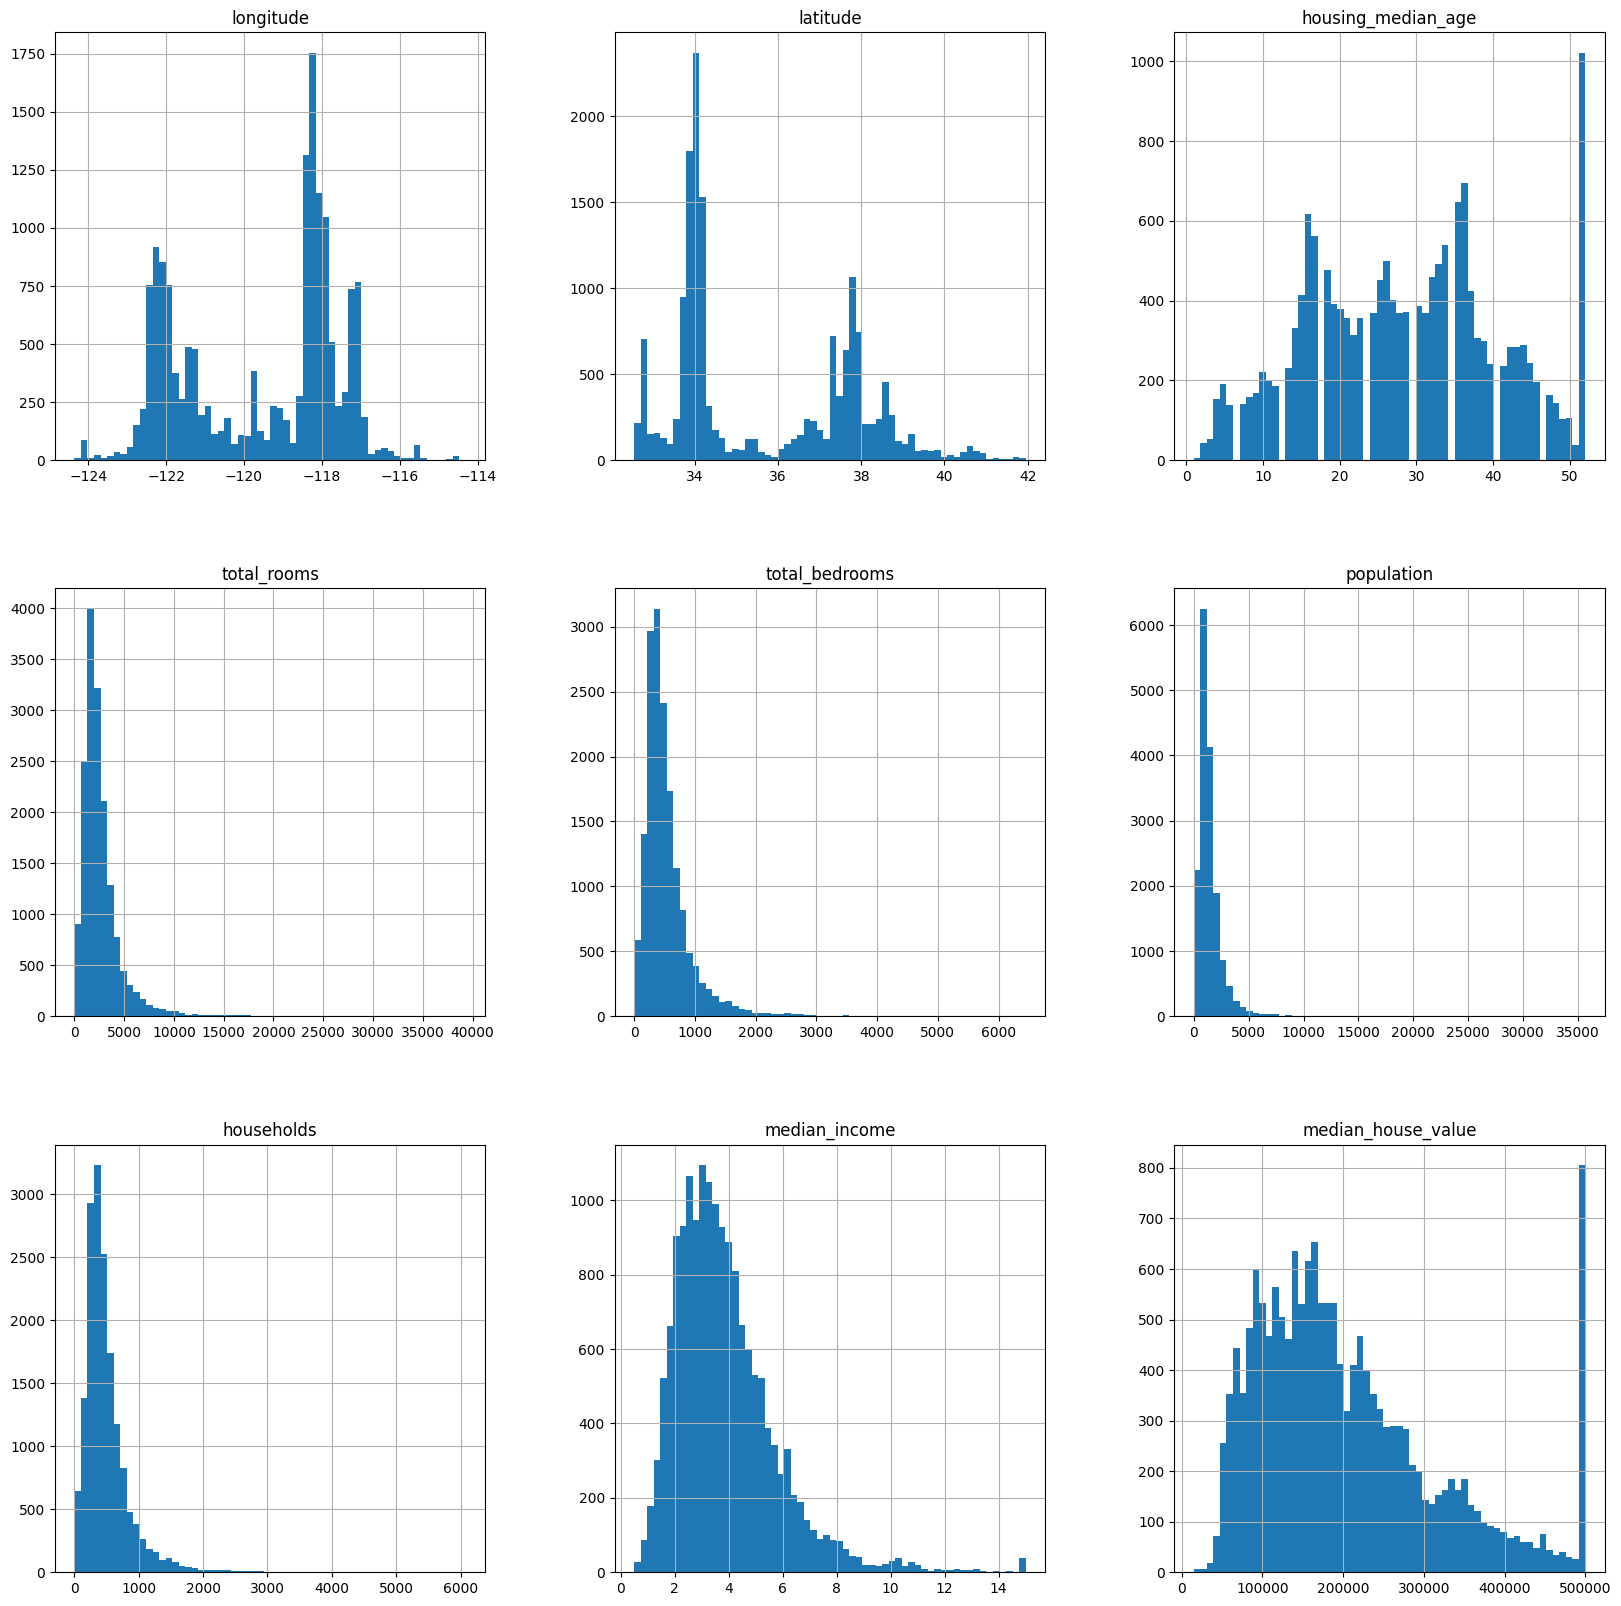

In [69]:
data.drop("Unnamed: 0", axis=1).hist(bins=60,figsize=(20, 20))

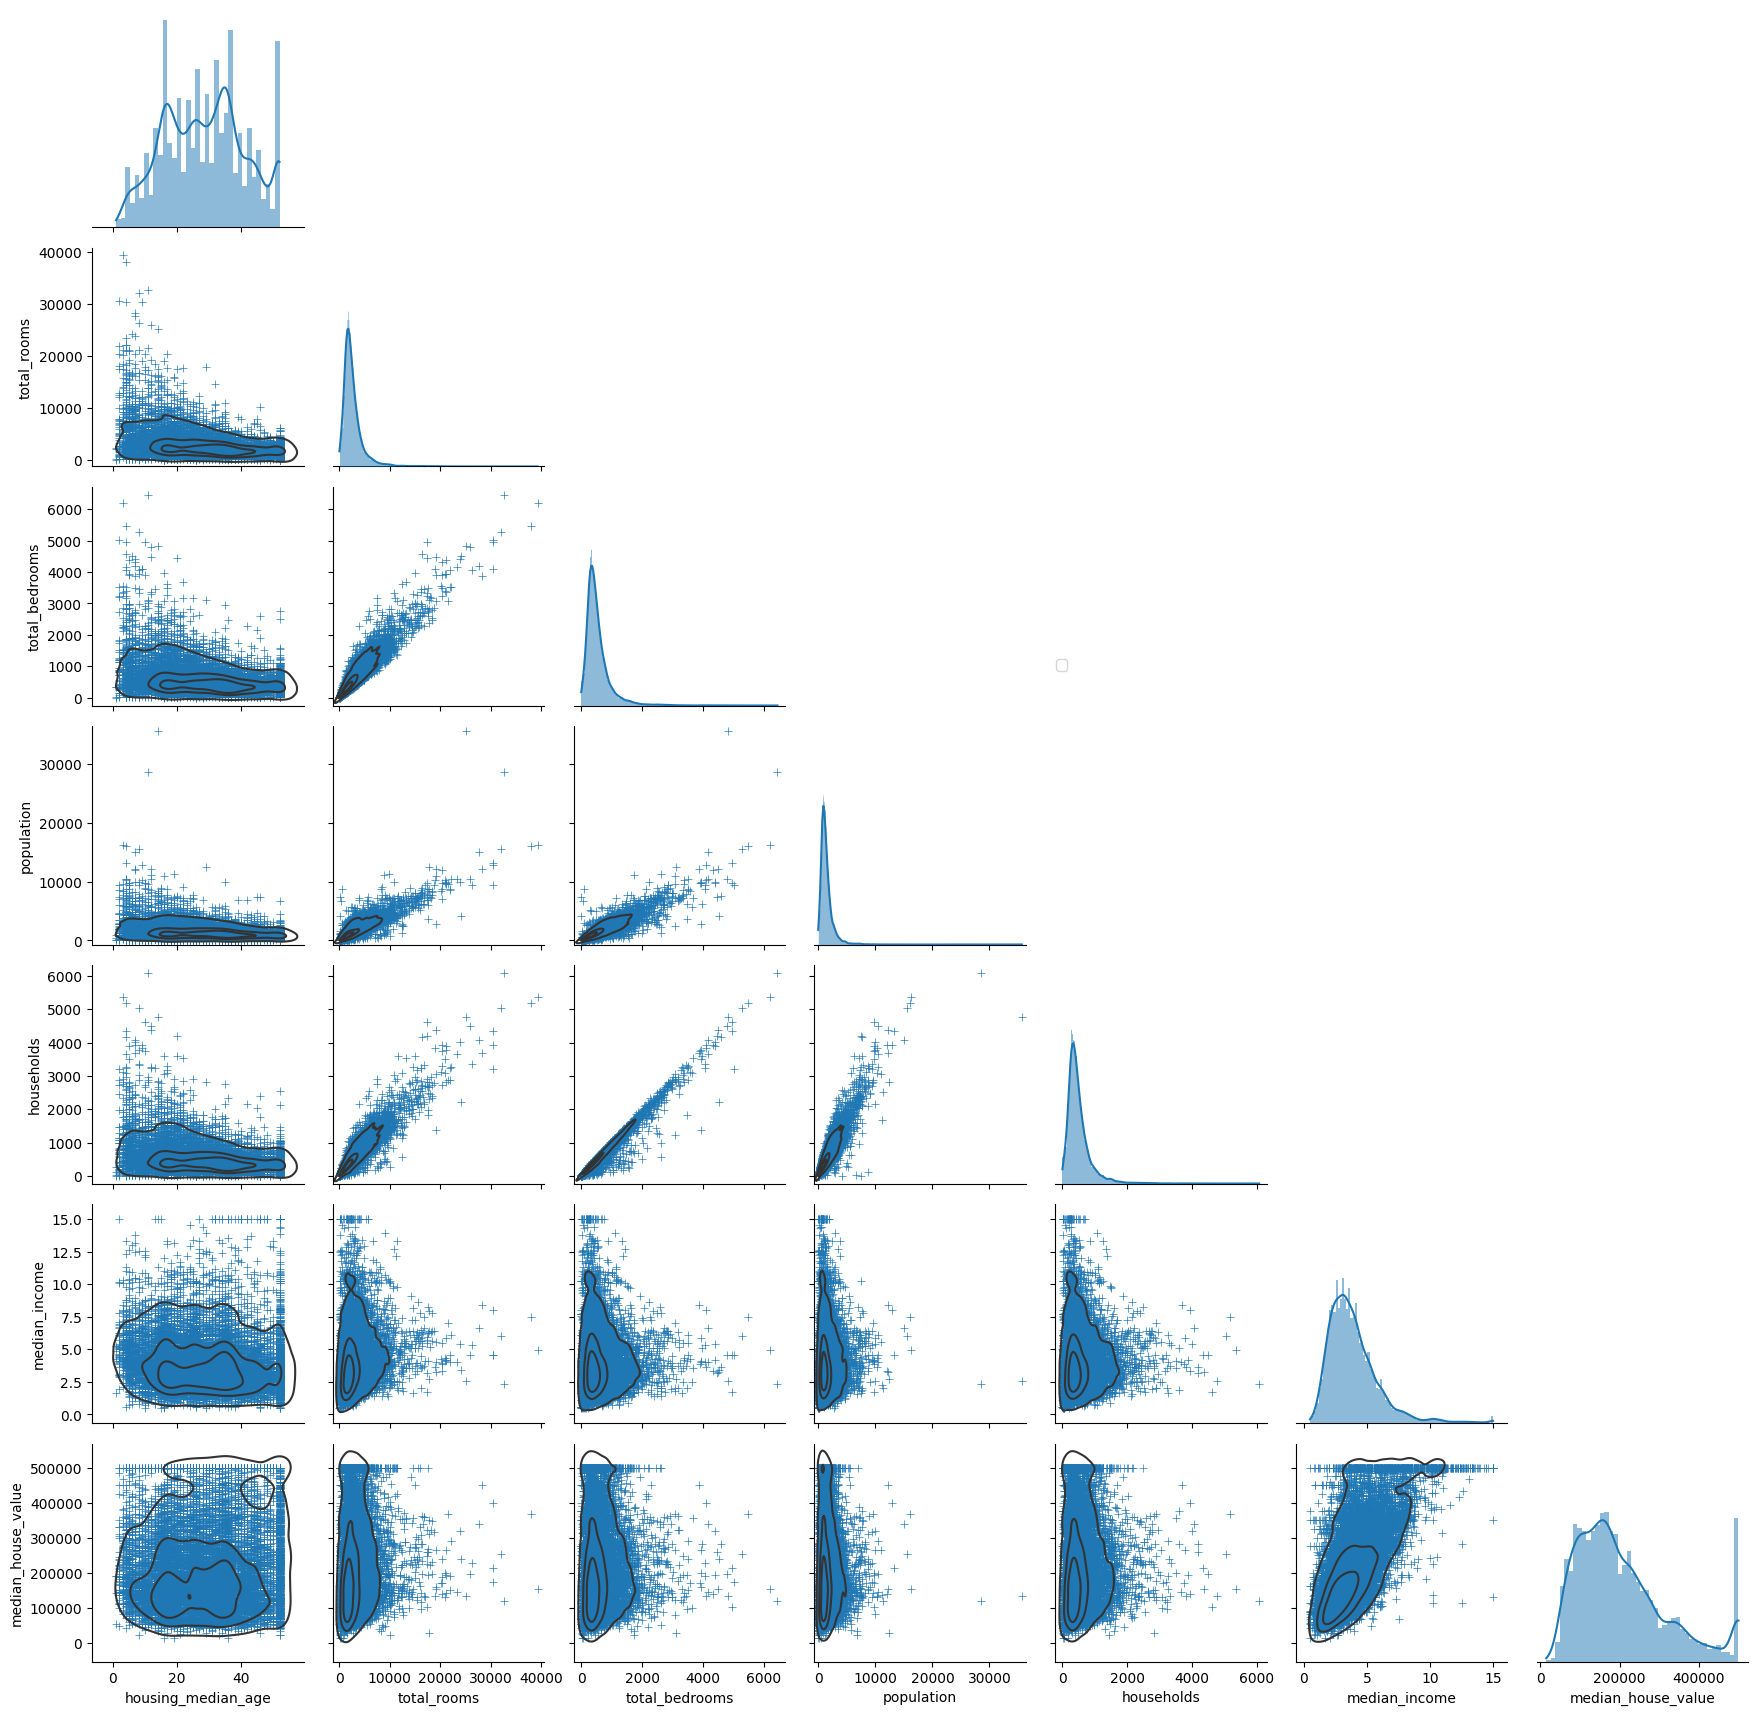

In [86]:
g = sns.PairGrid(data = data.drop(["Unnamed: 0",'ocean_proximity','latitude','longitude'], axis=1),corner = True)
g.map_lower(sns.kdeplot, hue = None, levels = 4, color = ".2")
g.map_lower(sns.scatterplot, marker = "+")
g.map_diag(sns.histplot, element = 'step', linewidth=0,kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61,.6))

In [92]:
data['total_bedrooms'].corr(data['households'])

0.9799935407952638

In [ ]:
#On remarque que certaines variables sont extremement correlées, les plus évidentes étant total_bedrooms et households.
#On pourrait donc retirer une de ces variables. Il serait judicieux de retirer la variable total_bedrooms, puisqu'elle contient
#des valeurs manquantes. On pourrait donc à la fois rendre le modèle plus simple et éviter l'imputation

In [95]:
data['population'].corr(data['total_rooms'])

0.855772058460174

In [93]:
data['population'].corr(data['households'])

0.9076469213392173

In [94]:
data['total_rooms'].corr(data['households'])

0.9202252775881942